<a href="https://colab.research.google.com/github/salav2006poudyal2025/5CS037_ASSESMENT_3RD_2462257_SULAV_POUDYAL/blob/main/2462257_SulavPoudyal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SULAV POUDYAL                        
WLV_ID: 2462257        
COllEGE_ID: NP03CS4A240047          
SUBMITTED ON: 10TH FEB 2026

# Exploratory Data Analysis and Data Understanding


# Choosing a Dataset

The dataset selected for this regression task is the Heart Attack Risk Dataset, containing approximately 8,764 rows and 26 columns, originally published on Kaggle under the title “Heart Attack Prediction Dataset.” It includes medical, demographic, and lifestyle indicators used to estimate a continuous Heart Attack Risk Score, making it suitable for health‑related regression modeling.

This dataset aligns strongly with UNSDG 3: Good Health and Wellbeing, because predicting heart‑attack risk supports early diagnosis, disease prevention, and improved public health outcomes. It also contributes to data‑driven planning of healthcare resources and better community health strategies.

The CSV file downloaded from Kaggle was uploaded to Google Drive and loaded using pandas.read_csv(), enabling cleaning, preprocessing, exploratory analysis, and development of multiple regression models.

The dataset was originally compiled for heart‑disease risk analysis and features medically relevant indicators such as cholesterol, blood pressure, stress levels, glucose, and lifestyle behaviors. These attributes were collected and structured to help identify key patterns associated with cardiovascular health, and the dataset now appears on Kaggle with clear definitions for all included variables.

The dataset was accessed through Kaggle, where it is publicly available as the Heart Attack Prediction Dataset, offering open access to learners, researchers, and healthcare analysts interested in understanding clinical and behavioral contributors to cardiovascular risk.

This dataset supports UNSDG 3 through data-driven health assessment, while also indirectly supporting UNSDG 10 (Reduced Inequalities) by highlighting how health risks may vary across demographic groups. It further relates to UNSDG 11 (Sustainable Cities & Communities) by enabling insights that help design healthier, more physically active, and wellness‑focused communities.
The dataset includes a diverse range of attributes such as
medical indicators (cholesterol, blood pressure, heart rate, BMI, glucose, triglycerides),
lifestyle and behavioral factors (smoking habits, alcohol intake, exercise hours, sedentary time, diet type),
demographic attributes (age, gender, family history, diabetes status),
culminating in the continuous target variable Heart Attack Risk Score, which represents overall likelihood or severity of heart‑attack risk.

Identifying meaningful questions the dataset can answer

Which medical factors most strongly influence heart-attack risk?   
Variables: cholesterol, blood pressure, triglycerides, BMI, glucose  
Method: Regression coefficients, feature importance rankings  

How do lifestyle behaviors impact risk levels?  
Variables: smoking, alcohol use, exercise hours, sedentary time, stress level  
Method: Partial dependence, error comparison across behavioral categories  

Can heart‑attack risk be predicted accurately from combined health indicators?  
Variables: All medical + lifestyle features  
Method: Model comparison across Linear Regression, Random Forest Regressor, and Neural Networks  

In [11]:
# -------------------- UNIVERSAL IMPORTS FOR ALL TASKS --------------------

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# OS & file handling
import os           # for file paths, directory operations
import io           # for in-memory streams
import re           # regular expressions, used for cleaning column names
import json         # for saving/loading JSON objects if needed

# Numerical & data handling
import numpy as np  # fundamental numeric operations, arrays, random seeds
import pandas as pd # dataframes, reading/writing CSVs, data manipulation

# Visualization
import seaborn as sns       # advanced statistical plots
import matplotlib.pyplot as plt  # plotting basic charts and figures

# -------------------- MODEL SELECTION & CROSS-VALIDATION --------------------
from sklearn.model_selection import (
    train_test_split,    # splitting dataset into train/test
    GridSearchCV,        # exhaustive hyperparameter search with CV
    RandomizedSearchCV   # random hyperparameter search with CV
)

# -------------------- PIPELINE & TRANSFORMERS --------------------
from sklearn.compose import ColumnTransformer  # combine different preprocessors for numeric/categorical
from sklearn.pipeline import Pipeline           # chain preprocessing + model
from sklearn.preprocessing import (
    StandardScaler,      # standardize numeric features (zero mean, unit variance)
    OneHotEncoder,       # convert categorical variables to binary/dummy variables
    FunctionTransformer  # apply arbitrary functions to data (used for feature selection)
)

# -------------------- MODELS --------------------
from sklearn.linear_model import (
    LinearRegression,    # basic linear regression model
    Ridge                # linear regression with L2 regularization
)
from sklearn.ensemble import (
    RandomForestRegressor  # ensemble of decision trees for regression
)
from sklearn.neural_network import MLPRegressor  # multi-layer perceptron for regression

# -------------------- FEATURE SELECTION --------------------
from sklearn.feature_selection import RFE  # Recursive Feature Elimination (used for Ridge)

# -------------------- EVALUATION METRICS --------------------
from sklearn.metrics import (
    mean_squared_error,  # regression loss: mean squared error
    r2_score,            # coefficient of determination
    mean_absolute_error  # regression loss: mean absolute error
)

from sklearn.exceptions import ConvergenceWarning
# suppress only convergence warnings from iterative models like MLP
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Exploratory Data Analysis (EDA)

Original dataset shape: (8763, 26)
Duplicates dropped by Patient_ID: 0
Exact duplicate rows dropped: 0

First 5 rows:
  Patient_ID   Age     Sex  Cholesterol  Heart_Rate  Diabetes  Family_History  \
0    BMW7812  67.0    Male        208.0        72.0         0               0   
1    CZE1114  21.0    Male        389.0        98.0         1               1   
2    BNI9906  21.0  Female        324.0        72.0         1               0   
3    JLN3497  84.0    Male        383.0        73.0         1               1   
4    GFO8847  66.0    Male        318.0        93.0         1               1   

   Smoking  Obesity  Alcohol_Consumption  ...  \
0        1        0                    0  ...   
1        1        1                    1  ...   
2        0        0                    0  ...   
3        1        0                    1  ...   
4        1        1                    0  ...   

   Physical_Activity_Days_Per_Week Sleep_Hours_Per_Day    Country  \
0                              

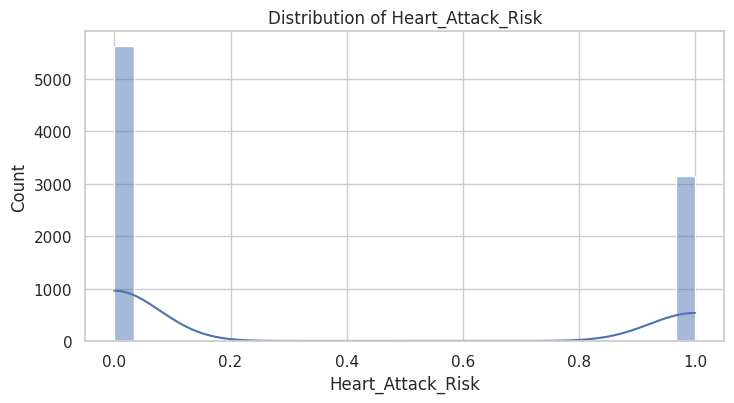

[Insight] Heart_Attack_Risk: mean=0.358, median=0.000, std=0.480, min=0.000, max=1.000, skew=0.592


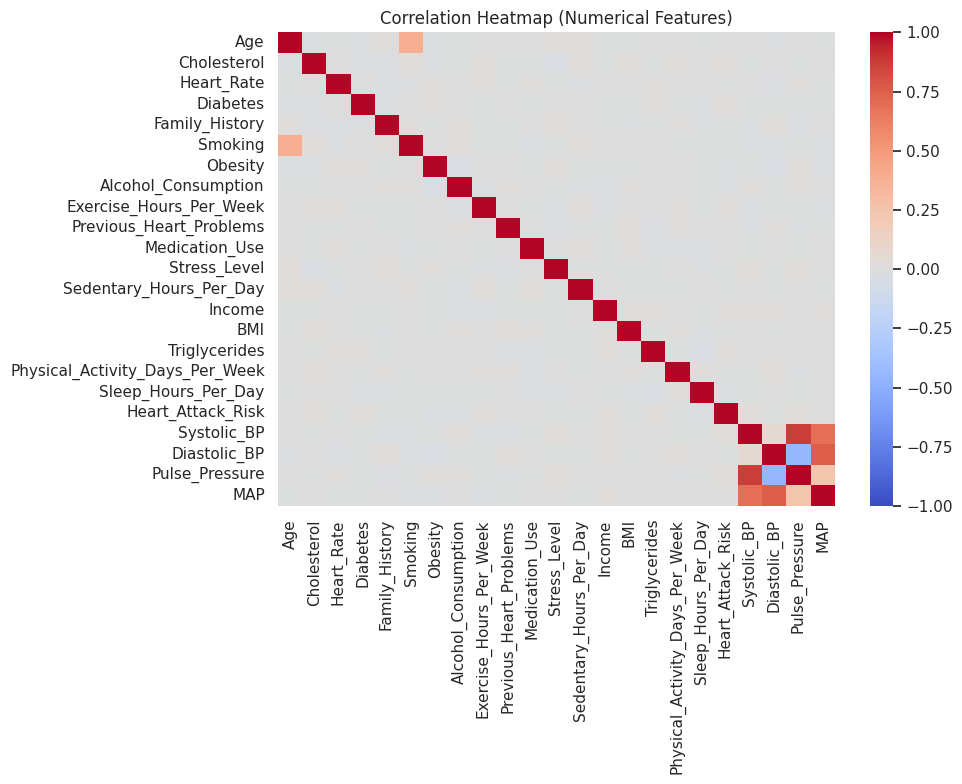

[Insight] Top correlations with Heart_Attack_Risk:
Cholesterol                0.019339
Pulse_Pressure             0.018958
Systolic_BP                0.017897
Diabetes                   0.017225
Exercise_Hours_Per_Week    0.011172
Name: Heart_Attack_Risk, dtype: float64
[Insight] Most negative correlations with Heart_Attack_Risk:
Sleep_Hours_Per_Day       -0.018528
Alcohol_Consumption       -0.013778
Obesity                   -0.013318
Diastolic_BP              -0.005893
Sedentary_Hours_Per_Day   -0.005640
Name: Heart_Attack_Risk, dtype: float64


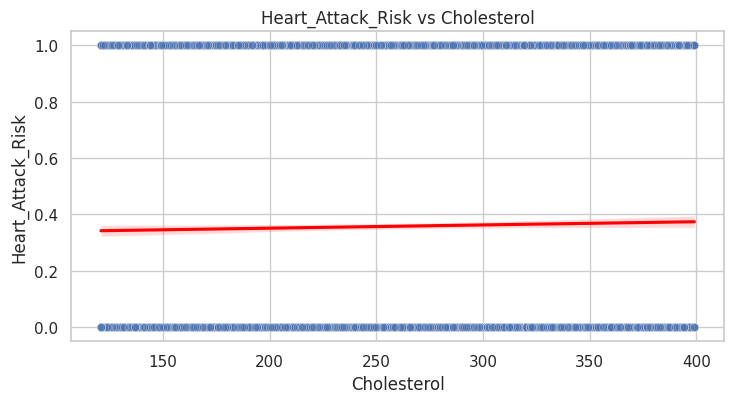

[Insight] Pearson r(Heart_Attack_Risk, Cholesterol) = 0.019 (weak linearity)


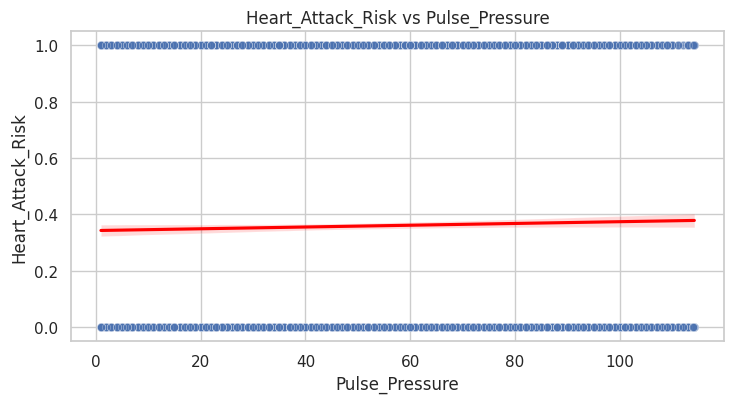

[Insight] Pearson r(Heart_Attack_Risk, Pulse_Pressure) = 0.019 (weak linearity)


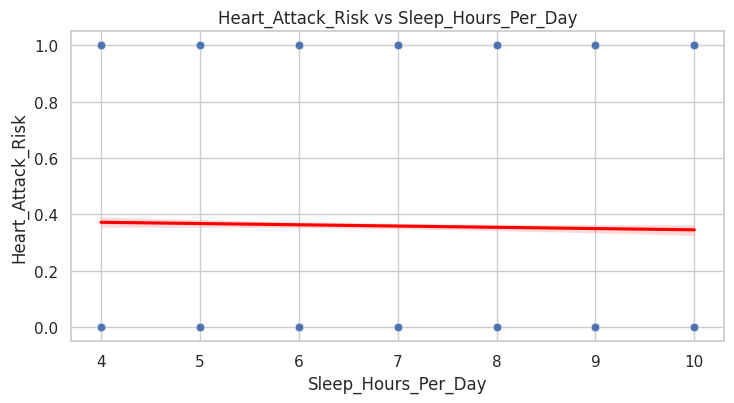

[Insight] Pearson r(Heart_Attack_Risk, Sleep_Hours_Per_Day) = -0.019 (weak linearity)


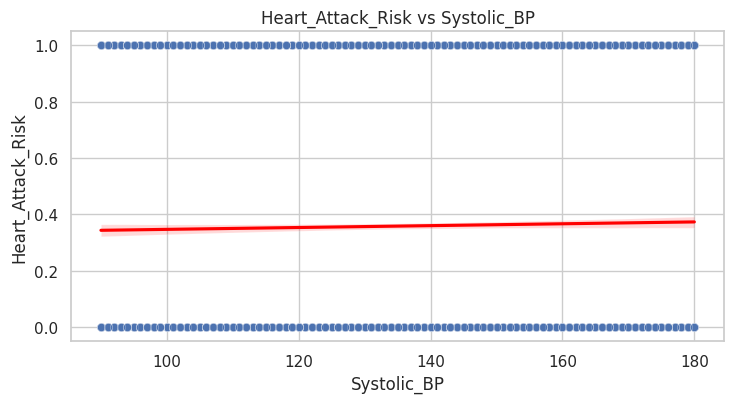

[Insight] Pearson r(Heart_Attack_Risk, Systolic_BP) = 0.018 (weak linearity)


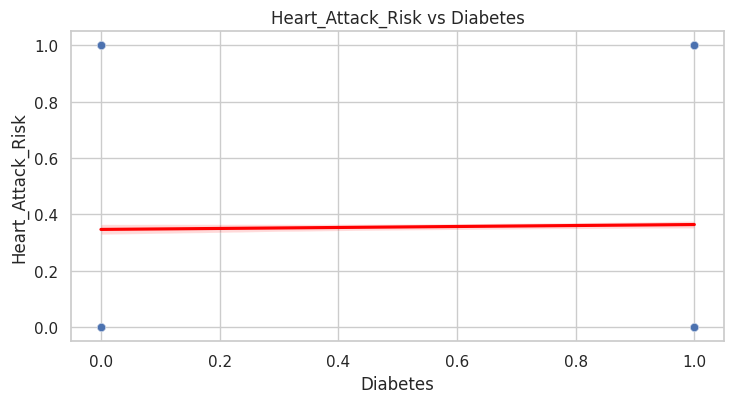

[Insight] Pearson r(Heart_Attack_Risk, Diabetes) = 0.017 (weak linearity)


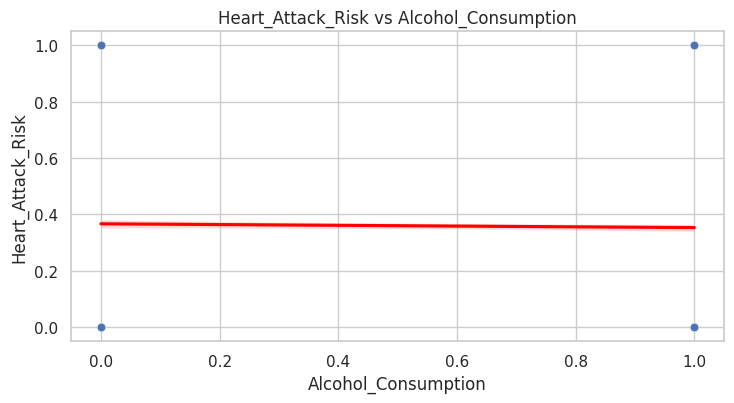

[Insight] Pearson r(Heart_Attack_Risk, Alcohol_Consumption) = -0.014 (weak linearity)


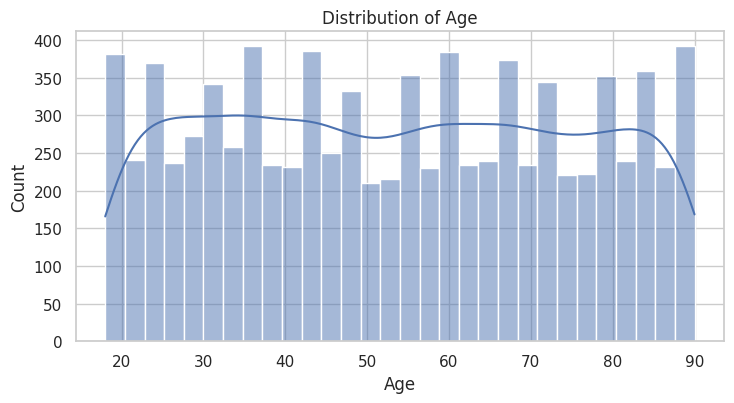

[Insight] Age: mean=53.71, median=54.00, std=21.25, skew=0.03


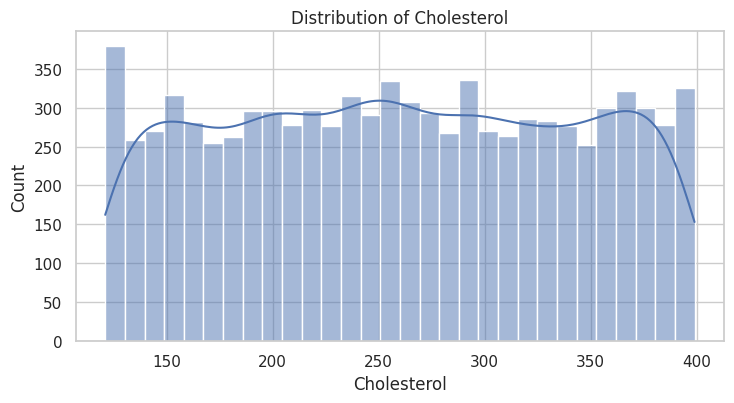

[Insight] Cholesterol: mean=259.88, median=259.00, std=80.85, skew=-0.00


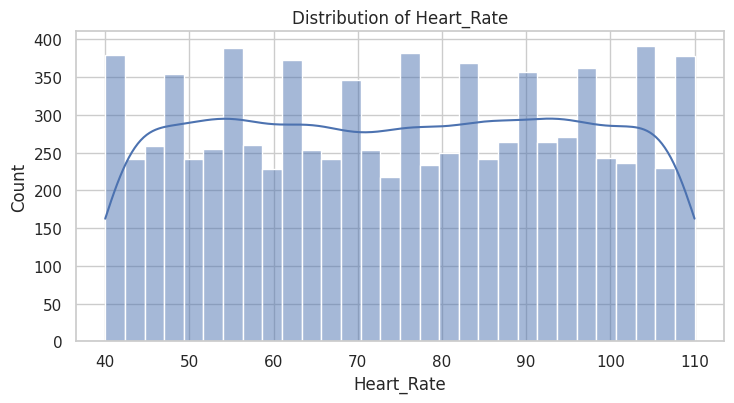

[Insight] Heart_Rate: mean=75.02, median=75.00, std=20.55, skew=-0.00


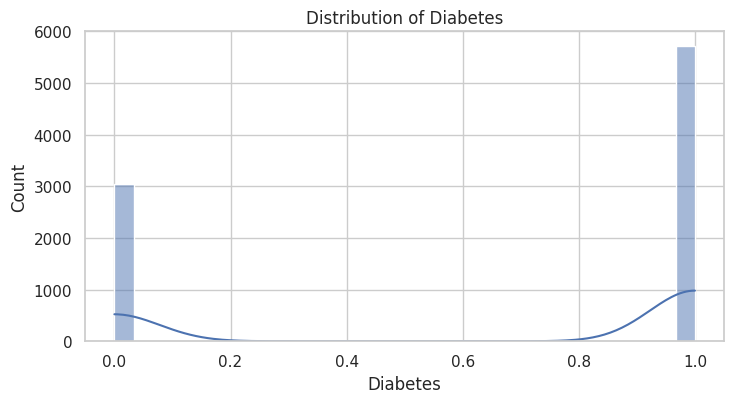

[Insight] Diabetes: mean=0.65, median=1.00, std=0.48, skew=-0.64


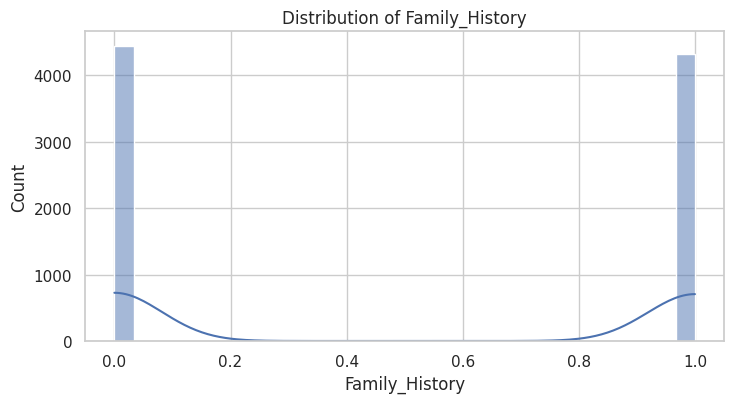

[Insight] Family_History: mean=0.49, median=0.00, std=0.50, skew=0.03


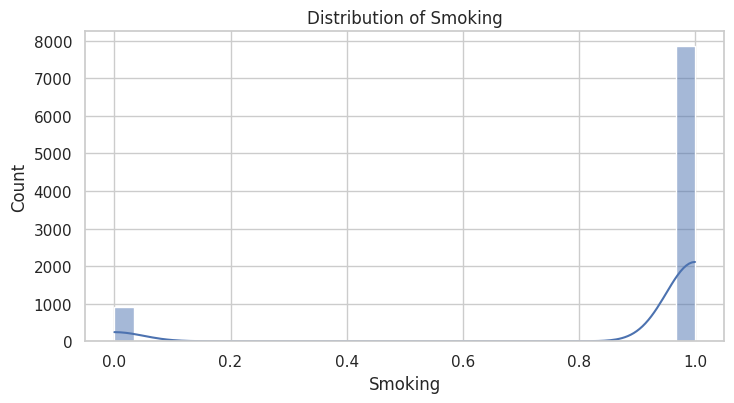

[Insight] Smoking: mean=0.90, median=1.00, std=0.30, skew=-2.61


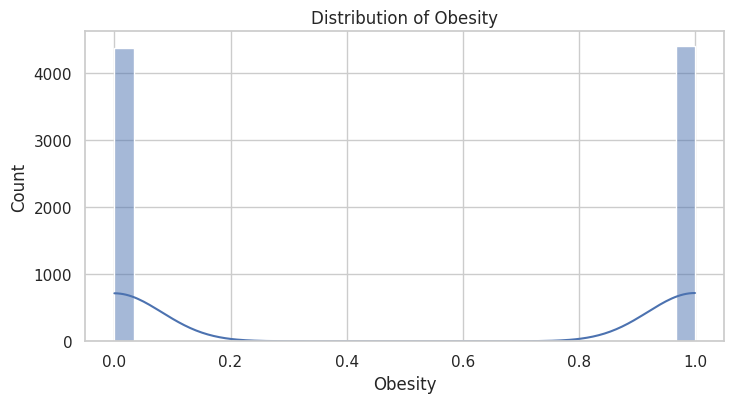

[Insight] Obesity: mean=0.50, median=1.00, std=0.50, skew=-0.01


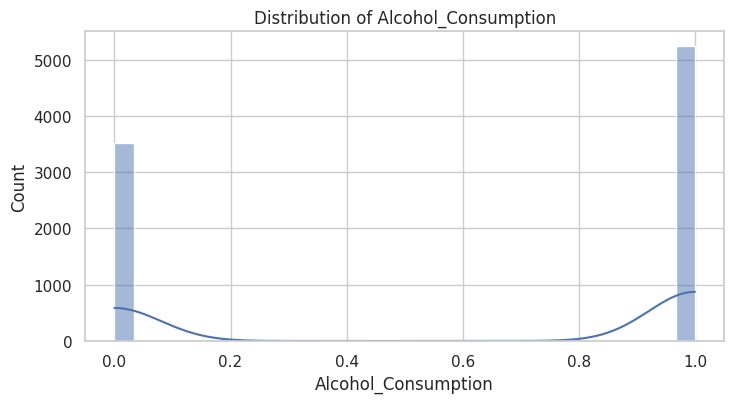

[Insight] Alcohol_Consumption: mean=0.60, median=1.00, std=0.49, skew=-0.40


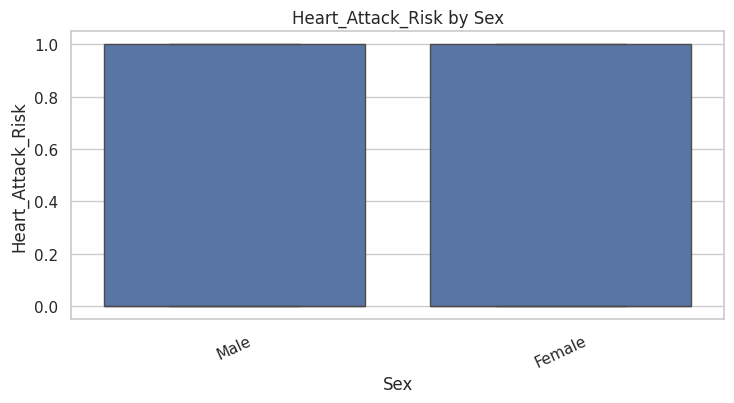

[Insight] Group comparison for Sex:
            mean  median  count
Sex                            
Male    0.359188     0.0   6111
Female  0.355958     0.0   2652



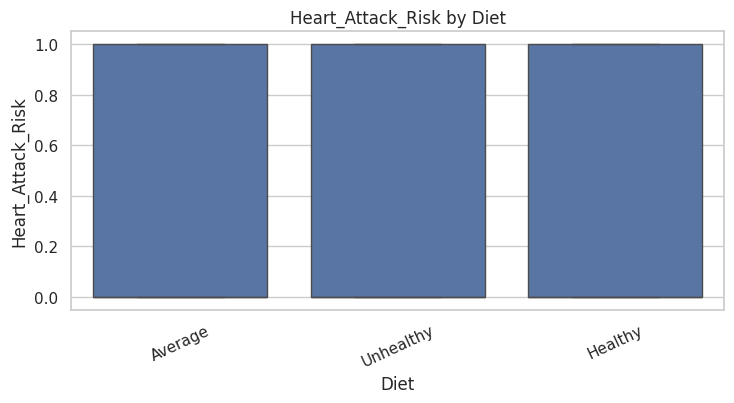

[Insight] Group comparison for Diet:
               mean  median  count
Diet                              
Healthy    0.364527     0.0   2960
Unhealthy  0.357662     0.0   2891
Average    0.352335     0.0   2912



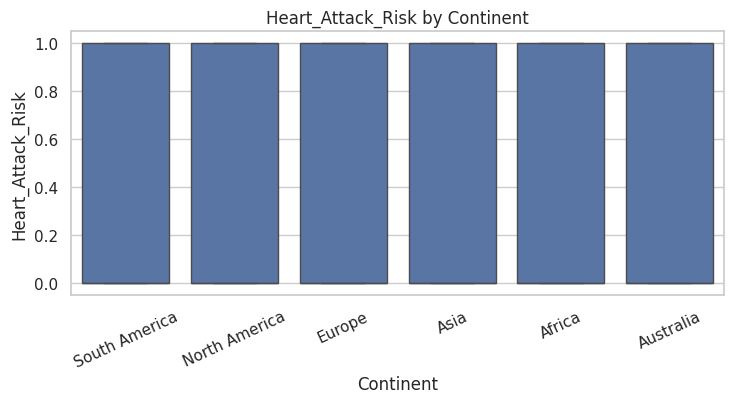

[Insight] Group comparison for Continent:
                   mean  median  count
Continent                             
North America  0.376744     0.0    860
Africa         0.368843     0.0    873
South America  0.366373     0.0   1362
Australia      0.360860     0.0    884
Asia           0.353913     0.0   2543
Europe         0.345828     0.0   2241

Cleaned dataset saved to: /content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv


In [17]:
# Set seaborn theme for consistent EDA visuals
sns.set(style="whitegrid", context="notebook")

# Set default figure size for all plots
plt.rcParams["figure.figsize"] = (7.5, 4.2)

# Fix random seed to ensure reproducibility
np.random.seed(42)

# Load the raw dataset from Google Drive
CSV_IN = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack.csv"
df_raw = pd.read_csv(CSV_IN)

# Display original dataset dimensions
print(f"Original dataset shape: {df_raw.shape}")

# Create a working copy of the dataset
df = df_raw.copy()

# Normalize column names by trimming spaces and replacing spaces with underscores
df.columns = [re.sub(r"\s+", "_", c.strip()) for c in df.columns]

# Trim whitespace from all string-based columns
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

# Standardize common missing value tokens into actual NaN values
missing_tokens = ['–', '—', '…', 'NA', 'N/A', '', 'na', 'Na', 'nan', 'NaN',
                  'None', 'none', 'Unknown', 'unknown']
df.replace(missing_tokens, np.nan, inplace=True)

# Split Blood Pressure into Systolic and Diastolic if provided as a single column
if "Blood_Pressure" in df.columns:
    bp = df["Blood_Pressure"].astype(str).str.split("/", expand=True)
    if bp.shape[1] == 2:
        df["Systolic_BP"]  = pd.to_numeric(bp[0], errors="coerce")
        df["Diastolic_BP"] = pd.to_numeric(bp[1], errors="coerce")
    df.drop(columns=["Blood_Pressure"], inplace=True, errors="ignore")

# Define the target variable for regression
TARGET_COL = "Heart_Attack_Risk"

# Ensure the target column exists in the dataset
if TARGET_COL not in df.columns:
    raise ValueError("Target column 'Heart_Attack_Risk' not found.")

# Convert object columns to numeric if at least 90% of values are numeric-like
for col in df.columns:
    if df[col].dtype == "object":
        probe = pd.to_numeric(df[col], errors="coerce")
        if (1 - probe.isna().mean()) >= 0.90:
            df[col] = probe

# Helper function to normalize binary columns to {0,1}
def normalize_binary(col):
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df.loc[~df[col].isin([0,1]), col] = np.nan

# List of binary health indicators
bin_cols = [
    "Diabetes","Family_History","Smoking","Obesity",
    "Previous_Heart_Problems","Medication_Use"
]

# Apply binary normalization
for bc in bin_cols:
    if bc in df.columns:
        normalize_binary(bc)

# Standardize sex values into Male/Female
if "Sex" in df.columns:
    df["Sex"] = (df["Sex"].astype(str)
                    .str.strip()
                    .str.title()
                    .replace({"M":"Male","F":"Female"}))

# Clean diet labels and normalize capitalization
if "Diet" in df.columns:
    df["Diet"] = (df["Diet"].astype(str)
                    .str.strip()
                    .str.title()
                    .replace({"Na":np.nan}))

# Correct hemisphere values based on country where obvious mismatches exist
country_to_hemi = {
    "Spain":"Northern Hemisphere","France":"Northern Hemisphere","Germany":"Northern Hemisphere",
    "Italy":"Northern Hemisphere","United Kingdom":"Northern Hemisphere","UK":"Northern Hemisphere",
    "Canada":"Northern Hemisphere","United States":"Northern Hemisphere","United States of America":"Northern Hemisphere",
    "China":"Northern Hemisphere","India":"Northern Hemisphere","Japan":"Northern Hemisphere",
    "South Korea":"Northern Hemisphere","Nigeria":"Northern Hemisphere","Colombia":"Northern Hemisphere",
    "Australia":"Southern Hemisphere","New Zealand":"Southern Hemisphere",
    "South Africa":"Southern Hemisphere","Argentina":"Southern Hemisphere","Brazil":"Southern Hemisphere"
}

# Apply hemisphere correction using country mapping
if "Country" in df.columns and "Hemisphere" in df.columns:
    fix_mask = df["Country"].isin(country_to_hemi.keys())
    df.loc[fix_mask, "Hemisphere"] = df.loc[fix_mask, "Country"].map(country_to_hemi)

# Define realistic bounds for numeric health-related features
bounds = {
    "Age": (18, 100),
    "Heart_Rate": (30, 220),
    "Systolic_BP": (70, 250),
    "Diastolic_BP": (40, 150),
    "Exercise_Hours_Per_Week": (0, 40),
    "Sleep_Hours_Per_Day": (0, 24),
    "Sedentary_Hours_Per_Day": (0, 24),
    "Physical_Activity_Days_Per_Week": (0, 7),
    "Stress_Level": (0, 10),
    "BMI": (10, 70),
    "Cholesterol": (60, 700),
    "Triglycerides": (30, 2000),
    "Income": (0, 1e7)
}

# Remove values outside medically plausible ranges
for col, (lo, hi) in bounds.items():
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df.loc[(df[col] < lo) | (df[col] > hi), col] = np.nan

# Fix swapped systolic and diastolic readings
if {"Systolic_BP","Diastolic_BP"}.issubset(df.columns):
    swap_mask = (
        df["Diastolic_BP"].notna() &
        df["Systolic_BP"].notna() &
        (df["Diastolic_BP"] > df["Systolic_BP"])
    )
    df.loc[swap_mask, ["Systolic_BP","Diastolic_BP"]] = \
        df.loc[swap_mask, ["Diastolic_BP","Systolic_BP"]].values

# Compute pulse pressure and mean arterial pressure from blood pressure
if {"Systolic_BP","Diastolic_BP"}.issubset(df.columns):
    df["Pulse_Pressure"] = df["Systolic_BP"] - df["Diastolic_BP"]
    df.loc[(df["Pulse_Pressure"] < 0) | (df["Pulse_Pressure"] > 200), "Pulse_Pressure"] = np.nan
    df["MAP"] = df["Diastolic_BP"] + df["Pulse_Pressure"] / 3
    df.loc[(df["MAP"] < 40) | (df["MAP"] > 180), "MAP"] = np.nan
    df["Pulse_Pressure"] = df["Pulse_Pressure"].round(1)
    df["MAP"] = df["MAP"].round(1)

# Remove duplicate patient records using Patient_ID
if "Patient_ID" in df.columns:
    before = len(df)
    df = df.drop_duplicates(subset=["Patient_ID"], keep="first")
    print(f"Duplicates dropped by Patient_ID: {before - len(df)}")

# Remove fully duplicated rows
before = len(df)
df = df.drop_duplicates()
print(f"Exact duplicate rows dropped: {before - len(df)}")

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# Impute numeric missing values using median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical missing values using mode
for col in cat_cols:
    mode = df[col].mode(dropna=True)
    df[col] = df[col].fillna(mode.iloc[0] if not mode.empty else "Unknown")

# Enforce integer format for binary columns
for bc in bin_cols:
    if bc in df.columns:
        df[bc] = df[bc].astype(int)

# Reduce the influence of extreme outliers using winsorization
clip_lo, clip_hi = 0.005, 0.995
for c in df.select_dtypes(include=[np.number]).columns:
    if c == TARGET_COL:
        continue
    lo, hi = df[c].quantile([clip_lo, clip_hi])
    df[c] = df[c].clip(lo, hi)

# Round selected continuous features for cleaner presentation
for col, decimals in {
    "Exercise_Hours_Per_Week": 1,
    "Sedentary_Hours_Per_Day": 1,
    "BMI": 1
}.items():
    if col in df.columns:
        df[col] = df[col].round(decimals)

# Refresh column lists after cleaning
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# Verify that no missing values remain
assert df.isna().sum().sum() == 0, "Missing values remain after imputation."

# Display sample rows for sanity check
print("\nFirst 5 rows:")
print(df.head())

# Display dataset structure and data types
buf = io.StringIO()
df.info(buf=buf)
print("\nDataset info:")
print(buf.getvalue())

# Show descriptive statistics for numeric features
print("\nNumeric summary (first 12 rows):")
print(df[num_cols].describe().T.head(12))

# Function to compute percentage of IQR-based outliers
def iqr_outlier_pct(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return ((s < low) | (s > high)).mean() * 100

# Calculate outlier percentage for numeric features
outlier_pct = pd.Series({c: iqr_outlier_pct(df[c]) for c in num_cols})
print("\nOutlier % (top 15):")
print(outlier_pct.sort_values(ascending=False).head(15))

# Visualize the distribution of the target variable
plt.figure()
sns.histplot(df[TARGET_COL], bins=30, kde=True)
plt.title(f"Distribution of {TARGET_COL}")
plt.tight_layout()
plt.show()

# Print descriptive insights for the target variable
t = df[TARGET_COL]
print(f"[Insight] {TARGET_COL}: mean={t.mean():.3f}, median={t.median():.3f}, "
      f"std={t.std():.3f}, min={t.min():.3f}, max={t.max():.3f}, skew={t.skew():.3f}")

# Compute and visualize correlation matrix for numeric features
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.tight_layout()
    plt.show()

    # Display strongest positive and negative correlations with the target
    if TARGET_COL in corr.columns:
        ct = corr[TARGET_COL].drop(TARGET_COL)
        print(f"[Insight] Top correlations with {TARGET_COL}:\n{ct.sort_values(ascending=False).head(5)}")
        print(f"[Insight] Most negative correlations with {TARGET_COL}:\n{ct.sort_values(ascending=True).head(5)}")

# Select top correlated numeric features for scatter analysis
plot_feats = []
if len(num_cols) > 1 and TARGET_COL in num_cols:
    ct_abs = corr[TARGET_COL].drop(TARGET_COL).abs().sort_values(ascending=False)
    plot_feats = ct_abs.head(6).index.tolist()

# Scatter plots showing relationship with target
for col in plot_feats:
    plt.figure()
    sns.scatterplot(x=df[col], y=df[TARGET_COL], alpha=0.35)
    sns.regplot(x=df[col], y=df[TARGET_COL], scatter=False, color="red")
    plt.title(f"{TARGET_COL} vs {col}")
    plt.tight_layout()
    plt.show()

    r = df[[col, TARGET_COL]].corr().iloc[0, 1]
    print(f"[Insight] Pearson r({TARGET_COL}, {col}) = {r:.3f} "
          f"{'(moderate/strong linearity)' if abs(r) >= 0.3 else '(weak linearity)'}")

# Plot distributions of key numeric predictors
for col in [c for c in num_cols if c != TARGET_COL][:8]:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

    print(f"[Insight] {col}: mean={df[col].mean():.2f}, median={df[col].median():.2f}, "
          f"std={df[col].std():.2f}, skew={df[col].skew():.2f}")

# Compare target distribution across low-cardinality categorical features
low_card_cats = [c for c in cat_cols if 2 <= df[c].nunique() <= 8][:3]
for c in low_card_cats:
    plt.figure()
    sns.boxplot(data=df, x=c, y=TARGET_COL)
    plt.title(f"{TARGET_COL} by {c}")
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.show()

    grp = df.groupby(c)[TARGET_COL].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print(f"[Insight] Group comparison for {c}:\n{grp}\n")

# Recompute derived blood pressure metrics before saving
if {"Systolic_BP","Diastolic_BP"}.issubset(df.columns):
    df["Pulse_Pressure"] = (df["Systolic_BP"] - df["Diastolic_BP"]).round(1)
    df["MAP"] = (df["Diastolic_BP"] + df["Pulse_Pressure"] / 3).round(1)

# Save the fully cleaned and processed dataset
CSV_OUT = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
df.to_csv(CSV_OUT, index=False)
print(f"Cleaned dataset saved to: {os.path.abspath(CSV_OUT)}")


# Build a Neural Network Model


In [3]:
# Suppress convergence warnings from neural network training
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the cleaned dataset produced during EDA and preprocessing
CSV_CLEAN = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
df = pd.read_csv(CSV_CLEAN)

# Define the target variable for regression
TARGET_COL = "Heart_Attack_Risk"

# Ensure the target variable exists
assert TARGET_COL in df.columns, "Target column not found in the dataset."

# Remove ID-like columns as they carry no predictive information
drop_cols = [c for c in ["Patient_ID"] if c in df.columns]

# Separate features (X) and target (y)
X = df.drop(columns=[TARGET_COL] + drop_cols, errors="ignore")
y = df[TARGET_COL].astype(float)  # keep continuous for regression

# Identify numerical feature columns
num_cols = X.select_dtypes(
    include=["int64", "float64", "int32", "float32"]
).columns.tolist()

# Identify categorical feature columns
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing strategy:
# - Numerical features: Standard scaling (zero mean, unit variance)
# - Categorical features: One-Hot Encoding
try:
    # For newer scikit-learn versions (>=1.2)
    # Groups rare categories and limits category explosion
    ohe = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False,
        min_frequency=0.01,
        max_categories=30
    )
except TypeError:
    # Backward compatibility for older scikit-learn versions
    ohe = OneHotEncoder(
        handle_unknown="ignore",
        sparse=False
    )

# Combine numerical and categorical preprocessing into a single transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop"
)

# Train–test split configuration
# If the target behaves like binary (0/1), use stratification to preserve distribution
stratify_arg = y if set(np.unique(y)).issubset({0.0, 1.0}) else None

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=stratify_arg
)

# Define the neural network regression model (MLPRegressor)
"""
Network Architecture:
- Input layer: determined automatically after preprocessing
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2: 64 neurons with ReLU activation
- Output Layer: 1 neuron with linear activation (default for regression)

Loss Function:
- Mean Squared Error (default in MLPRegressor)

Optimizer:
- Adam optimizer with adaptive learning rate

Regularization:
- L2 penalty controlled by alpha=1e-4

Training Strategy:
- Early stopping based on validation score
- Internal validation split of 10%
"""
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate="adaptive",
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=600,
    random_state=42
)

# Create a full pipeline combining preprocessing and neural network model
model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("mlp_regressor", mlp)
])

# Train the neural network model on the training data
model.fit(X_train, y_train)

# Evaluation function to compute regression performance metrics
def evaluate(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                         # Root Mean Squared Error
    r2   = r2_score(y_true, y_pred)             # R-squared score
    print(f"{name:>5} | MSE: {mse:.6f} | RMSE: {rmse:.6f} | R²: {r2:.6f}")

# Display model performance on training and test datasets
print("\nNeural Network Regression Performance")
evaluate("Train", y_train, model.predict(X_train))
evaluate(" Test", y_test,  model.predict(X_test))



Neural Network Regression Performance
Train | MSE: 0.214650 | RMSE: 0.463304 | R²: 0.066305
 Test | MSE: 0.247121 | RMSE: 0.497112 | R²: -0.074882


# Build Primary Models

In [4]:
# Suppress non-critical user warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Load the cleaned dataset prepared during preprocessing and EDA
CSV_CLEAN = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
TARGET_COL = "Heart_Attack_Risk"
df = pd.read_csv(CSV_CLEAN)

# Ensure the target variable exists in the dataset
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found."

# Decide whether to drop high-cardinality columns
# Patient_ID has no predictive value; Country may create too many dummy variables
DROP_COUNTRY = False
drop_cols = [c for c in ["Patient_ID"] if c in df.columns]
if DROP_COUNTRY:
    drop_cols += [c for c in ["Country"] if c in df.columns]

# Separate features (X) and target variable (y)
X = df.drop(columns=[TARGET_COL] + drop_cols, errors="ignore")
y = df[TARGET_COL].astype("float32")

# Convert numeric features to float32 for memory efficiency and consistency
X = X.copy()
numeric_cast_cols = X.select_dtypes(include=["int64", "float64"]).columns
if len(numeric_cast_cols) > 0:
    X[numeric_cast_cols] = X[numeric_cast_cols].astype("float32")

# Identify numerical and categorical feature columns
num_cols = X.select_dtypes(
    include=["int32", "int64", "float32", "float64"]
).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Define preprocessing constraints for categorical variables
# Rare categories are grouped and the total number of one-hot features is capped
RARE_CAT_MIN_FREQ = 0.01
MAX_CATEGORIES = 30

# One-Hot Encoder for sparse output (ideal for Linear Regression)
try:
    ohe_sparse = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=True,
        min_frequency=RARE_CAT_MIN_FREQ,
        max_categories=MAX_CATEGORIES
    )
except TypeError:
    ohe_sparse = OneHotEncoder(
        handle_unknown="ignore",
        sparse=True
    )

# Preprocessing pipeline for linear models
# StandardScaler is applied without centering to support sparse matrices
preprocess_sparse = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), num_cols),
        ("cat", ohe_sparse, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

# One-Hot Encoder for dense output (required for tree-based models)
try:
    ohe_dense = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False,
        min_frequency=RARE_CAT_MIN_FREQ,
        max_categories=MAX_CATEGORIES
    )
except TypeError:
    ohe_dense = OneHotEncoder(
        handle_unknown="ignore",
        sparse=False
    )

# Preprocessing pipeline for tree-based models
# Numerical features are passed directly since trees do not require scaling
preprocess_dense = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe_dense, cat_cols),
    ],
    remainder="drop"
)

# Split the dataset into training (80%) and testing (20%) sets
# Stratification is applied if the target behaves like a binary variable
stratify_arg = y if set(np.unique(y)).issubset({0.0, 1.0}) else None
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=stratify_arg
)

# Define the primary regression models
models = {
    "Linear Regression": Pipeline([
        ("prep", preprocess_sparse),
        ("model", LinearRegression())
    ]),
    "Random Forest Regressor": Pipeline([
        ("prep", preprocess_dense),
        ("model", RandomForestRegressor(
            n_estimators=200,
            max_depth=12,
            min_samples_leaf=3,
            random_state=42,
            n_jobs=-1
        ))
    ])
}

# Function to compute standard regression evaluation metrics
def metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2": r2, "MAE": mae}

# Train each model and evaluate performance on training and testing data
results = {}
print("\nPrimary ML Models — Regression Performance\n")

for name, pipe in models.items():
    pipe.fit(X_train, y_train)

    # Predictions on training and test sets
    ytr = pipe.predict(X_train)
    yte = pipe.predict(X_test)

    # Compute evaluation metrics
    tr = metrics(y_train, ytr)
    te = metrics(y_test, yte)
    results[name] = {"Train": tr, "Test": te}

    # Display results for each model
    print(f"{name}")
    print(f"  Train | MSE: {tr['MSE']:.6f} | RMSE: {tr['RMSE']:.6f} | R²: {tr['R2']:.6f} | MAE: {tr['MAE']:.6f}")
    print(f"   Test | MSE: {te['MSE']:.6f} | RMSE: {te['RMSE']:.6f} | R²: {te['R2']:.6f} | MAE: {te['MAE']:.6f}\n")

# Initial comparison of models based on Test RMSE
best = min(results.items(), key=lambda kv: kv[1]["Test"]["RMSE"])
print("Initial Model Comparison (by Test RMSE):")

for name, stats in sorted(results.items(), key=lambda kv: kv[1]["Test"]["RMSE"]):
    s = stats["Test"]
    print(f"  {name:22s} → RMSE: {s['RMSE']:.6f} | R²: {s['R2']:.6f} | MAE: {s['MAE']:.6f}")

# Identify the best-performing model according to test RMSE
print(f"\n→ Current winner by Test RMSE: {best[0]}")



Primary ML Models — Regression Performance

Linear Regression
  Train | MSE: 0.228522 | RMSE: 0.478039 | R²: 0.005968 | MAE: 0.457043
   Test | MSE: 0.230979 | RMSE: 0.480603 | R²: -0.004672 | MAE: 0.459530

Random Forest Regressor
  Train | MSE: 0.142646 | RMSE: 0.377686 | R²: 0.379511 | MAE: 0.358878
   Test | MSE: 0.231239 | RMSE: 0.480873 | R²: -0.005802 | MAE: 0.458760

Initial Model Comparison (by Test RMSE):
  Linear Regression      → RMSE: 0.480603 | R²: -0.004672 | MAE: 0.459530
  Random Forest Regressor → RMSE: 0.480873 | R²: -0.005802 | MAE: 0.458760

→ Current winner by Test RMSE: Linear Regression


# Hyper-parameter Optimization with Cross-Validation


In [5]:
# Load the cleaned dataset generated from earlier preprocessing steps
CSV_CLEAN = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
TARGET_COL = "Heart_Attack_Risk"
df = pd.read_csv(CSV_CLEAN)

# Ensure the target variable exists in the dataset
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found."

# Separate features and target variable
# Patient_ID is removed as it carries no predictive information
drop_cols = [c for c in ["Patient_ID"] if c in df.columns]
X = df.drop(columns=[TARGET_COL] + drop_cols, errors="ignore")
y = df[TARGET_COL].astype("float32")  # keep target continuous for regression

# Identify numerical and categorical feature columns
num_cols = X.select_dtypes(
    include=["int32", "int64", "float32", "float64"]
).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Factory function to create a version-compatible OneHotEncoder
def make_ohe_dense():
    """
    Returns a OneHotEncoder that produces dense output.
    Uses min_frequency and max_categories when supported to
    limit feature explosion from rare categories.
    """
    try:
        return OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False,
            min_frequency=0.01,
            max_categories=30
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown="ignore",
                sparse=False,
                min_frequency=0.01,
                max_categories=30
            )
        except TypeError:
            return OneHotEncoder(
                handle_unknown="ignore",
                sparse=False
            )

# Instantiate dense OneHotEncoder
ohe_dense = make_ohe_dense()

# Preprocessing pipeline for linear models (Ridge Regression)
# Numeric features are standardized; categorical features are one-hot encoded
preprocess_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe_dense,       cat_cols),
    ],
    remainder="drop"
)

# Preprocessing pipeline for Random Forest
# Scaling is unnecessary for tree-based models
preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe_dense,     cat_cols),
    ],
    remainder="drop"
)

# Split the dataset into training (80%) and testing (20%) sets
# Stratification is applied only if the target behaves like a binary variable
USE_STRATIFY = True
stratify_arg = y if (USE_STRATIFY and set(np.unique(y)).issubset({0.0, 1.0})) else None

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=stratify_arg
)

# Helper function to evaluate model performance
def evaluate(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    r2   = float(r2_score(y_true, y_pred))
    print(f"{name:>15} | RMSE: {rmse:.6f} | R²: {r2:.6f}")
    return rmse, r2

# Hyperparameter tuning for Ridge Regression using GridSearchCV
print("\n Hyperparameter tuning — Ridge Regression")

# Pipeline combining preprocessing and Ridge regression model
lr_pipeline = Pipeline([
    ("preprocess", preprocess_lr),
    ("model", Ridge(random_state=42))
])

# Grid of regularization strengths to explore
lr_params = {
    "model__alpha": [0.0, 0.01, 0.1, 1.0, 10.0]
}

# GridSearchCV with 5-fold cross-validation
# RMSE is used as the optimization metric
lr_grid = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=lr_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fit Ridge model with cross-validation
lr_grid.fit(X_train, y_train)

# Report best hyperparameters and corresponding CV performance
print(f"Best Hyperparameters (Ridge): {lr_grid.best_params_}")
ridge_cv_rmse = -lr_grid.best_score_
print(f"Best CV RMSE (Ridge): {ridge_cv_rmse:.6f}")

# Evaluate the tuned Ridge model on the test set
y_pred_lr = lr_grid.predict(X_test)
print("Test Performance (Ridge):")
ridge_test_rmse, ridge_test_r2 = evaluate("Ridge", y_test, y_pred_lr)

# Store best Ridge hyperparameters in memory
ridge_best_params = lr_grid.best_params_
print("[Task 4] Ridge artifacts kept in memory.")

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
print("\n Hyperparameter tuning — Random Forest (RandomizedSearchCV)")

# Pipeline combining preprocessing and Random Forest regressor
rf_pipeline = Pipeline([
    ("preprocess", preprocess_rf),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Hyperparameter search space for Random Forest
rf_params = {
    "model__n_estimators": [50, 100, 150, 250],
    "model__max_depth": [8, 12, 16, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 3, 5],
    "model__max_features": ["sqrt", "log2"],
    "model__bootstrap": [True, False],
}

# RandomizedSearchCV for efficient hyperparameter exploration
rf_random = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_params,
    n_iter=24,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit Random Forest with randomized cross-validation search
rf_random.fit(X_train, y_train)

# Report best Random Forest hyperparameters and CV score
print(f"Best Hyperparameters (RF): {rf_random.best_params_}")
rf_cv_rmse = -rf_random.best_score_
print(f"Best CV RMSE (RF): {rf_cv_rmse:.6f}")

# Evaluate the tuned Random Forest model on the test set
y_pred_rf = rf_random.predict(X_test)
print("Test Performance (RF):")
rf_test_rmse, rf_test_r2 = evaluate("RandomForest", y_test, y_pred_rf)

# Store best Random Forest hyperparameters in memory
rf_best_params = rf_random.best_params_
print("[Task 4] RF artifacts kept in memory.")

# Create a summary table comparing tuned models on the test set
results = pd.DataFrame({
    "Model": ["Ridge", "RandomForest"],
    "Test_RMSE": [ridge_test_rmse, rf_test_rmse],
    "Test_R2":   [ridge_test_r2,   rf_test_r2],
    "Best_CV_RMSE": [ridge_cv_rmse, rf_cv_rmse]
})

# Display final comparison results
print("\nTask 4 — Test Set Comparison:")
print(results)



 Hyperparameter tuning — Ridge Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters (Ridge): {'model__alpha': 10.0}
Best CV RMSE (Ridge): 0.481286
Test Performance (Ridge):
          Ridge | RMSE: 0.480475 | R²: -0.004137
[Task 4] Ridge artifacts kept in memory.

 Hyperparameter tuning — Random Forest (RandomizedSearchCV)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters (RF): {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__min_samples_leaf': 5, 'model__max_features': 'log2', 'model__max_depth': 8, 'model__bootstrap': True}
Best CV RMSE (RF): 0.480245
Test Performance (RF):
   RandomForest | RMSE: 0.479325 | R²: 0.000661
[Task 4] RF artifacts kept in memory.

Task 4 — Test Set Comparison:
          Model  Test_RMSE   Test_R2  Best_CV_RMSE
0         Ridge   0.480475 -0.004137      0.481286
1  RandomForest   0.479325  0.000661      0.480245


# Feature Selection

In [18]:
# Goal:
# - Apply feature selection techniques discussed in Week-10
# - Use RFE for Ridge Regression
# - Use feature importance for Random Forest
# - Compare performance after selecting important features

CSV_CLEAN  = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
TARGET_COL = "Heart_Attack_Risk"
TOP_PRINT  = 15  # Number of top selected features to display


# Version-safe OneHotEncoder creator
# Ensures compatibility across different sklearn versions
def make_ohe_dense():
    """Returns a OneHotEncoder with dense output.
       Supports min_frequency and max_categories when available."""
    try:
        return OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False,
            min_frequency=0.01,
            max_categories=30
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown="ignore",
                sparse=False,
                min_frequency=0.01,
                max_categories=30
            )
        except TypeError:
            return OneHotEncoder(handle_unknown="ignore", sparse=False)


# Load cleaned dataset
df = pd.read_csv(CSV_CLEAN)
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found."


# Drop non-predictive ID-like columns
# Patient_ID has no predictive meaning
drop_cols = [c for c in ["Patient_ID"] if c in df.columns]
X = df.drop(columns=[TARGET_COL] + drop_cols, errors="ignore")
y = df[TARGET_COL].astype("float32")  # Convert target to float for regression


# Identify numeric and categorical feature columns
num_cols = X.select_dtypes(include=["int32","int64","float32","float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]


# Train-test split (80-20)
# Stratify only if target is binary {0,1}
stratify_arg = y if set(np.unique(y)).issubset({0.0, 1.0}) else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=stratify_arg
)


# Create OneHotEncoder instance
ohe = make_ohe_dense()


# Preprocessing for Ridge Regression
# - Standardize numeric features
# - One-hot encode categorical features
preprocess_lr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe,            cat_cols),
    ],
    remainder="drop"
)


# Preprocessing for Random Forest
# - No scaling needed for tree models
# - One-hot encode categorical features
preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe,           cat_cols),
    ],
    remainder="drop"
)


# Fit preprocessors on training data and transform both sets
X_train_lr = preprocess_lr.fit_transform(X_train)
X_test_lr  = preprocess_lr.transform(X_test)

X_train_rf = preprocess_rf.fit_transform(X_train)
X_test_rf  = preprocess_rf.transform(X_test)


# Helper function to extract feature names after ColumnTransformer
# Handles both new and old sklearn versions
def get_feature_names_after_ct(ct: ColumnTransformer) -> np.ndarray:
    try:
        return ct.get_feature_names_out()
    except Exception:
        pass

    names = []
    for n, trans, cols in ct.transformers_:
        if n == "num":
            names += [f"num__{c}" for c in cols]
        elif n == "cat":
            try:
                names += list(trans.get_feature_names_out(cols))
            except Exception:
                for col, cats in zip(cols, trans.categories_):
                    names += [f"cat__{col}_{c}" for c in cats]
    return np.array(names, dtype=object)


# Extract feature names for both models
feature_names_lr = get_feature_names_after_ct(preprocess_lr)
feature_names_rf = get_feature_names_after_ct(preprocess_rf)


# Retrieve tuned hyperparameters from Task 4
# Use safe fallbacks if not found in memory

try:
    best_alpha = float(ridge_best_params.get("model__alpha", 1.0))
except NameError:
    best_alpha = 1.0
    print("[Task 5] Warning: ridge_best_params not found; using alpha=1.0")

try:
    rf_best_clean = {k.replace("model__", ""): v for k, v in rf_best_params.items()}
except NameError:
    rf_best_clean = dict(
        n_estimators=150,
        max_depth=8,
        min_samples_leaf=5,
        min_samples_split=2,
        max_features="log2",
        bootstrap=True
    )
    print("[Task 5] Warning: rf_best_params not found; using default RF settings.")


# Ensure reproducibility and parallel execution for Random Forest
rf_base = dict(random_state=42, n_jobs=-1)
rf_base.update(rf_best_clean)


# Ridge Regression Feature Selection using RFE
# RFE removes weakest features recursively using model coefficients
ridge = Ridge(alpha=best_alpha)

n_lr_feats = X_train_lr.shape[1]

# Select approximately 20% of features (clamped between 1 and 30)
target_k = max(1, n_lr_feats // 5)
k_ridge = min(30, max(1, min(target_k, n_lr_feats)))

rfe = RFE(estimator=ridge, n_features_to_select=k_ridge)
rfe.fit(X_train_lr, y_train)

ridge_mask = rfe.support_  # Boolean mask of selected features


# Retrain Ridge using selected features only
ridge.fit(X_train_lr[:, ridge_mask], y_train)
y_pred_ridge = ridge.predict(X_test_lr[:, ridge_mask])

ridge_rmse = float(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
ridge_r2   = float(r2_score(y_test, y_pred_ridge))


# Store selected features and their coefficients
selected_names_ridge = np.array(feature_names_lr)[ridge_mask]
ridge_coefs = ridge.coef_.ravel()

ridge_df = (
    pd.DataFrame({
        "feature": selected_names_ridge,
        "ridge_coef": ridge_coefs
    })
    .assign(abs_coef=lambda d: d["ridge_coef"].abs())
    .sort_values("abs_coef", ascending=False)
    .reset_index(drop=True)
)

print(" Ridge (RFE) results")
print(f"Selected features: {ridge_mask.sum()}")
print(f"Test RMSE: {ridge_rmse:.4f} | R²: {ridge_r2:.4f}\n")
print("Top features by |coef| (Ridge):")
print(ridge_df.head(TOP_PRINT).to_string(index=False), "\n")


# Random Forest Feature Selection using Feature Importance
# Tree-based models naturally rank features by importance
rf = RandomForestRegressor(**rf_base)
rf.fit(X_train_rf, y_train)

importances = rf.feature_importances_
n_rf_feats = importances.shape[0]


# Select approximately top 20% features (clamped)
target_k_rf = max(1, n_rf_feats // 5)
k_rf = min(30, max(1, min(target_k_rf, n_rf_feats)))

rf_idx = np.argsort(importances)[::-1][:k_rf]  # Indices of top features


# Retrain Random Forest using selected features only
rf.fit(X_train_rf[:, rf_idx], y_train)
y_pred_rf = rf.predict(X_test_rf[:, rf_idx])

rf_rmse = float(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
rf_r2   = float(r2_score(y_test, y_pred_rf))


# Store selected features and their importance scores
selected_names_rf = np.array(feature_names_rf)[rf_idx]
rf_imp_sorted = importances[rf_idx]

rf_df = (
    pd.DataFrame({
        "feature": selected_names_rf,
        "rf_importance": rf_imp_sorted
    })
    .sort_values("rf_importance", ascending=False)
    .reset_index(drop=True)
)

print(" Random Forest (Importance) results")
print(f"Selected features: {len(rf_idx)}")
print(f"Test RMSE: {rf_rmse:.4f} | R²: {rf_r2:.4f}\n")
print("Top features by importance (RF):")
print(rf_df.head(TOP_PRINT).to_string(index=False), "\n")


# Store selected feature artifacts for use in Task 6
ridge_selected_features_df = ridge_df.copy()
rf_selected_features_df    = rf_df.copy()
ridge_feature_mask         = ridge_mask.copy()
rf_feature_index           = rf_idx.copy().astype(int)

print("[Task 5] Feature selections kept in memory.")


 Ridge (RFE) results
Selected features: 11
Test RMSE: 0.4797 | R²: -0.0007

Top features by |coef| (Ridge):
                  feature  ridge_coef  abs_coef
       cat__Country_India   -0.049378  0.049378
cat__Country_South Africa   -0.042641  0.042641
       cat__Country_Japan   -0.040782  0.040782
    cat__Continent_Europe   -0.040341  0.040341
 cat__Country_South Korea    0.037827  0.037827
     cat__Country_Germany    0.031274  0.031274
       cat__Country_Spain    0.023248  0.023248
      cat__Country_Canada   -0.022728  0.022728
     cat__Country_Nigeria    0.020418  0.020418
 cat__Country_New Zealand   -0.020201  0.020201
     cat__Country_Vietnam   -0.018217  0.018217 

 Random Forest (Importance) results
Selected features: 11
Test RMSE: 0.4798 | R²: -0.0012

Top features by importance (RF):
                     feature  rf_importance
          num__Triglycerides       0.070563
                 num__Income       0.070130
                    num__BMI       0.068164
            nu

# Final Models and Comparative Analysis


In [19]:
# Goal:
# - Rebuild final models using:
#   • Optimal hyperparameters from Task 4
#   • Selected features from Task 5
# - Evaluate final performance on the test set
# - Present results in a structured comparison table

CSV_CLEAN = "/content/drive/MyDrive/Colab Notebooks/regression_heart_attack_cleaned.csv"
TARGET_COL = "Heart_Attack_Risk"

# Load cleaned dataset
df = pd.read_csv(CSV_CLEAN)
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found."


# Drop ID-like columns that do not contribute predictive information
drop_cols = [c for c in ["Patient_ID"] if c in df.columns]
X = df.drop(columns=[TARGET_COL] + drop_cols, errors="ignore")
y = df[TARGET_COL].astype("float32")  # Ensure float target for regression


# Identify numeric and categorical feature columns
num_cols = X.select_dtypes(include=["int32","int64","float32","float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]


# Train-test split (same configuration as previous tasks)
# Stratify only if the target is binary {0,1}
USE_STRATIFY = True
stratify_arg = y if (USE_STRATIFY and set(np.unique(y)).issubset({0.0, 1.0})) else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_arg
)


# Load best hyperparameters from Task 4
# These are expected to exist in memory from the previous task

try:
    best_alpha = float(ridge_best_params.get("model__alpha", 1.0))
except NameError:
    best_alpha = 1.0
    print("[Task 6] Warning: ridge_best_params not found; using alpha=1.0")

try:
    # Remove pipeline prefix from RF parameters
    rf_best_clean = {k.replace("model__", ""): v for k, v in rf_best_params.items()}
except NameError:
    # Fallback RF configuration if Task 4 was not executed
    rf_best_clean = dict(
        n_estimators=150, max_depth=8, min_samples_leaf=5, min_samples_split=2,
        max_features="log2", bootstrap=True, random_state=42, n_jobs=-1
    )
    print("[Task 6] Warning: rf_best_params not found; using default RF config.")


# Retrieve cross-validation RMSE values from Task 4
# These will be used in the final comparison table

try:
    ridge_cv_rmse
except NameError:
    ridge_cv_rmse = np.nan
    print("[Task 6] Warning: ridge_cv_rmse not found; reporting as NaN.")

try:
    rf_cv_rmse
except NameError:
    rf_cv_rmse = np.nan
    print("[Task 6] Warning: rf_cv_rmse not found; reporting as NaN.")


# Load selected feature artifacts from Task 5
# ridge_feature_mask → boolean mask for Ridge
# rf_feature_index   → index list for Random Forest

try:
    ridge_mask = ridge_feature_mask
except NameError:
    raise RuntimeError("[Task 6] ridge_feature_mask not found. Run Task 5 first.")

try:
    rf_idx = rf_feature_index
except NameError:
    raise RuntimeError("[Task 6] rf_feature_index not found. Run Task 5 first.")


# Version-safe dense OneHotEncoder for consistent preprocessing
def make_ohe_dense():
    try:
        return OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False,
            min_frequency=0.01,
            max_categories=30
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown="ignore",
                sparse=False,
                min_frequency=0.01,
                max_categories=30
            )
        except TypeError:
            return OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe = make_ohe_dense()


# Preprocessing pipelines (same as Task 5)
# Ridge: scaling + OHE
preprocess_lr = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", ohe, cat_cols)
], remainder="drop")

# Random Forest: numeric passthrough + OHE
preprocess_rf = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", ohe, cat_cols)
], remainder="drop")


# Safety checks to ensure feature selection aligns with transformed data
_ = preprocess_lr.fit(X_train)
n_cols_lr = preprocess_lr.transform(X_train).shape[1]
assert n_cols_lr == ridge_mask.shape[0], (
    f"Ridge mask length ({ridge_mask.shape[0]}) does not match transformed feature count ({n_cols_lr})."
)

_ = preprocess_rf.fit(X_train)
n_cols_rf = preprocess_rf.transform(X_train).shape[1]
assert int(rf_idx.max()) < int(n_cols_rf), (
    f"RF index selection exceeds transformed feature count ({n_cols_rf})."
)


# Feature selectors using previously selected features
# Ridge uses a boolean mask
# RF uses integer indices
select_ridge = FunctionTransformer(lambda Z: Z[:, ridge_mask], accept_sparse=True)
select_rf    = FunctionTransformer(lambda Z: Z[:, rf_idx],     accept_sparse=True)


# Final Ridge Regression Model
# Uses:
# - Optimal alpha from Task 4
# - Selected features from Task 5
final_ridge = Pipeline([
    ("preprocess", preprocess_lr),
    ("select", select_ridge),
    ("model", Ridge(alpha=best_alpha))
])

final_ridge.fit(X_train, y_train)
y_pred_ridge = final_ridge.predict(X_test)

ridge_rmse = float(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
ridge_r2   = float(r2_score(y_test, y_pred_ridge))


# Final Random Forest Model
# Uses:
# - Tuned hyperparameters from Task 4
# - Selected features from Task 5
# - Explicit reproducibility settings
if "random_state" not in rf_best_clean:
    rf_best_clean["random_state"] = 42
if "n_jobs" not in rf_best_clean:
    rf_best_clean["n_jobs"] = -1

final_rf = Pipeline([
    ("preprocess", preprocess_rf),
    ("select", select_rf),
    ("model", RandomForestRegressor(**rf_best_clean))
])

final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)

rf_rmse = float(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
rf_r2   = float(r2_score(y_test, y_pred_rf))


# Final comparison table for report / assignment
comparison = pd.DataFrame({
    "Model": ["Ridge (Final)", "Random Forest (Final)"],
    "Features Used": [
        f"Selected ({int(ridge_mask.sum())})",
        f"Selected ({int(len(rf_idx))})"
    ],
    "CV RMSE (from Task 4)": [ridge_cv_rmse, rf_cv_rmse],
    "Test RMSE": [ridge_rmse, rf_rmse],
    "Test R-squared": [ridge_r2, rf_r2]
})

print("\n=== Table 2: Comparison of Final Regression Models ===")
print(comparison)


=== Table 2: Comparison of Final Regression Models ===
                   Model  Features Used  CV RMSE (from Task 4)  Test RMSE  \
0          Ridge (Final)  Selected (11)               0.481286   0.479661   
1  Random Forest (Final)  Selected (11)               0.480245   0.479778   

   Test R-squared  
0       -0.000737  
1       -0.001225  
